# Analyzing Austin PD's Crime Reports Dataset

The dataset is available from the Austin Police Department on https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu.


## Table of Contents 

    I. Introduction
    II. Data Scrubbing
    III. Exploratory Analysis 
    
    Questions:
><ul>
><li><a href="#q1"> 1. What areas of Austin have the highest crime rates?</a></li>
><li><a href="#q2"> 2. How is crime distributed in 78701?</a></li> 
><li><a href="#q3"> 3. How is crime distributed in 78753?</a></li>     
><li><a href="#q4"> 4. How is crime distributed in 78741?</a></li>
><li><a href="#q5"> 5. How is crime distributed in 78745?</a></li>
><li><a href="#q6"> 6. How is crime distributed in 78705?</a></li>
><li><a href="#q7"> 7. How is crime distributed in 78746?</a></li>
><li><a href="#q8"> 8. How are violent crimes distributed?
><li><a href="#q9"> 9. How is crime distributed across different districts and sectors around Austin? Location types?
><li><a href="#q10"> 10. How is crime distributed across different
><li><a href="#q11"> 11. How does violent crime appear on the map?
><li><a href="#q12"> 12. Are there any addresses where violent crime and murder occurs frequently?
</a></li>

## I. Introduction

I began reviewing the Crime Reports dataset, provided by the Austin PD, around the same time I began reviewing its Hate Crimes datasets for analysis, at the beginning of 2020. This is a rather large dataset, containing over 2 million records, spanning from 2003 to the present, and is updated weekly. 

This is a self-paced project, conceived outside of both work and the educational arenas. It is my hope that this project will reveal some actionable insights that will benefit the Austin law enforcement community, news outlets, and anyone else interested in gaining knowledge on how best to combat the problem of crime in the Austin area.

I first attempted importing the data into this notebook using Sodapy's Socrata API method but found it lacking. It didn't import the entire dataset, and added several redundant columns. I, therefore, prefer to manually download the entire dataset and re-download each week after it's updated.

In [1]:
# importing necessary libraries and configurations
import folium
from folium import plugins

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import itertools
import warnings

pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
sb.set_style("whitegrid")
%matplotlib inline

In [2]:
# loading the data
df = pd.read_csv("Crime_Reports.csv")

In [3]:
# examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346122 entries, 0 to 2346121
Data columns (total 27 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Address                      object 
 12  Zip Code                     float64
 13  Council District             float64
 14  APD Sector                   object 
 15  APD District                 object 
 16  PRA                          object 
 17  Census Tract                 float64
 18  Clearance Status             object 
 19  

None

Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 166
Occurred Date                        0
Occurred Time                       85
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    21097
Address                             12
Zip Code                         14590
Council District                 47575
APD Sector                        9278
APD District                      9764
PRA                              11082
Census Tract                    437057
Clearance Status                611898
Clearance Date                  342710
UCR Category                   1543980
Category Description           1543980
X-coordinate                     10471
Y-coordinate                     10471
Latitude                         39771
Longitude                

Incident Number Highest Offense Description  Highest Offense Code  \
0      20191571574               FRAUD - OTHER                  1199   
1      20191550153              DEADLY CONDUCT                   408   
2      20195022816      THEFT OF LICENSE PLATE                   614   
3      20205007833               RUNAWAY CHILD                  4100   
4      20191671388       BURGLARY OF RESIDENCE                   500   

  Family Violence      Occurred Date Time Occurred Date  Occurred Time  \
0               N  06/03/2019 04:00:00 PM    06/03/2019         1600.0   
1               N  06/04/2019 03:12:00 AM    06/04/2019          312.0   
2               N  06/03/2019 03:00:00 PM    06/03/2019         1500.0   
3               N  02/22/2020 06:00:00 PM    02/22/2020         1800.0   
4               N  06/14/2019 12:00:00 PM    06/14/2019         1200.0   

         Report Date Time Report Date  Report Time  \
0  06/06/2019 05:34:00 PM  06/06/2019       1734.0   
1  06/04/2019 03:16:00 AM  06/04/2019        316.0   
2  06/04/2019 03:22:00 PM  06/04/2019       1522.0   
3  02/24/2020 06:03:00 PM  02/24/2020       1803.0   
4  06/16/2019 10:00:00 PM  06/16/2019       2200.0   

                 Location Type                       Address  Zip Code  \
0  DEPARTMENT / DISCOUNT STORE            10817 BALLARD PATH   78717.0   
1             RESIDENCE / HOME          8312 N IH 35 SVRD SB   78753.0   
2             RESIDENCE / HOME                6312 LIBYAN DR   78745.0   
3             RESIDENCE / HOME            13012 DEARBONNE DR   78617.0   
4             RESIDENCE / HOME  3809 SPICEWOOD SPRINGS RD EB   78731.0   

   Council District APD Sector APD District    PRA  Census Tract  \
0               6.0         AD            5  573.0        203.11   
1               4.0         ED            1  250.0         18.06   
2               2.0         FR            4  509.0         24.09   
3               2.0         HE            7  612.0           NaN   
4              10.0         BA            8  256.0         17.51   

  Clearance Status Clearance Date UCR Category Category Description  \
0              NaN            NaN          NaN                  NaN   
1                N     06/06/2019          13A   Aggravated Assault   
2                N     06/04/2019          23G                Theft   
3                N     03/03/2020          NaN                  NaN   
4                N     09/18/2019          220             Burglary   

   X-coordinate  Y-coordinate   Latitude  Longitude  \
0     3097785.0     3097785.0  30.483646 -97.789495   
1     3128227.0     3128227.0  30.346646 -97.696573   
2     3098393.0     3098393.0  30.205267 -97.794900   
3     3155456.0     3155456.0  30.176140 -97.615031   
4     3111039.0     3111039.0  30.364987 -97.750587   

                      Location  
0   (30.48364631, -97.7894953)  
1  (30.34664576, -97.69657342)  
2  (30.20526729, -97.79490043)  
3   (30.17613952, -97.6150307)  
4  (30.36498691, -97.75058749)

Incident Number  Highest Offense Description  Highest Offense Code  \
2346117      20143631822           FAMILY DISTURBANCE                  3400   
2346118      20191270738         THEFT BY SHOPLIFTING                   607   
2346119       2008501470  CRIMINAL TRESPASS/TRANSIENT                  2721   
2346120    2003921400113                          DWI                  2100   
2346121      20081340129    URINATING IN PUBLIC PLACE                  3212   

        Family Violence      Occurred Date Time Occurred Date  Occurred Time  \
2346117               N  12/29/2014 11:41:00 PM    12/29/2014         2341.0   
2346118               N  05/07/2019 10:50:00 AM    05/07/2019         1050.0   
2346119               N  02/19/2008 05:00:00 PM    02/19/2008         1700.0   
2346120               N  05/20/2003 01:32:00 AM    05/20/2003          132.0   
2346121               N  05/13/2008 01:10:00 AM    05/13/2008          110.0   

               Report Date Time Report Date  Report Time  \
2346117  12/29/2014 11:41:00 PM  12/29/2014       2341.0   
2346118  05/07/2019 11:31:00 AM  05/07/2019       1131.0   
2346119  02/19/2008 05:00:00 PM  02/19/2008       1700.0   
2346120  05/20/2003 01:32:00 AM  05/20/2003        132.0   
2346121  05/13/2008 01:10:00 AM  05/13/2008        110.0   

                        Location Type               Address  Zip Code  \
2346117              RESIDENCE / HOME    109 MASTERSON PASS   78753.0   
2346118   DEPARTMENT / DISCOUNT STORE    11423 N LAMAR BLVD   78753.0   
2346119         PARKING LOTS / GARAGE       6800 BERKMAN DR   78723.0   
2346120  STREETS / HWY / ROAD / ALLEY  4500 N MOPAC EXPY NB   78731.0   
2346121  STREETS / HWY / ROAD / ALLEY    400 BLOCK E 6TH ST   78701.0   

         Council District APD Sector APD District  PRA  Census Tract  \
2346117               4.0         ED            1  240         18.23   
2346118               7.0         ED            4  221         18.24   
2346119               1.0         ID            5  293         21.00   
2346120              10.0         BA            6  325          1.00   
2346121               9.0         GE            2  382         11.00   

        Clearance Status Clearance Date UCR Category Category Description  \
2346117                N     01/02/2015          NaN                  NaN   
2346118              NaN            NaN          23C                Theft   
2346119              NaN            NaN          NaN                  NaN   
2346120                C     05/22/2003          NaN                  NaN   
2346121                C     05/17/2008          NaN                  NaN   

         X-coordinate  Y-coordinate   Latitude  Longitude  \
2346117     3130776.0     3130776.0  30.369795 -97.687855   
2346118     3131578.0     3131578.0  30.383630 -97.684932   
2346119     3130390.0     3130390.0  30.320281 -97.690437   
2346120     3109748.0     3109748.0  30.320565 -97.755869   
2346121     3115491.0     3115491.0  30.267351 -97.739093   

                            Location  
2346117  (30.36979494, -97.68785533)  
2346118  (30.38362955, -97.68493154)  
2346119   (30.32028083, -97.6904366)  
2346120   (30.32056515, -97.7558693)  
2346121  (30.26735144, -97.73909331)

## II. Data Prep

There are several columns we don't need which we'll drop. We'll index the data according to the OCCURRED DATE TIME column. The following code creates a reproducible script for scrubbing and parsing the data.

In [4]:
df.duplicated().sum()

0

In [5]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [6]:
def clean_data(df):
    drop_col = [
        "Highest Offense Code",
        "Incident Number",
        "Occurred Time",
        "Occurred Date",
        "Report Date",
        "Report Time",
        "UCR Category",
        "X-coordinate",
        "Y-coordinate",
        "Location",
    ]
    df.drop(drop_col, axis=1, inplace=True)
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
    fillna = [
        "zip_code",
        "location_type",
        "council_district",
        "pra",
        "census_tract",
        "location_type",
        "apd_district",
        "apd_sector",
        "clearance_status",
        "category_description",
    ]
    df[fillna].fillna("Unknown", inplace=True)

    date_col = ["occurred_date_time", "report_date_time", "clearance_date"]

    cat_col = [
        "highest_offense_description",
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
        "pra",
        "census_tract",
        "category_description",
    ]

    df.family_violence = df.family_violence.replace({"Y": "True", "N": "False"})
    df.clearance_status = df.clearance_status.replace(
        {"C": "True", "O": "True", "N": "False"}
    )

    df[cat_col] = df[cat_col].astype("category")

    df[date_col] = df[date_col].astype("datetime64")

    df["year"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.year
    df["month"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.month
    df["week"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.week
    df["day"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.day
    df["hour"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.hour

    df.set_index(["occurred_date_time"], inplace=True)
    df.sort_index(inplace=True)
    return df


df = clean_data(df)

In [7]:
df.duplicated().sum()

703

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
# Re-examining the dataframe
display(df.info())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2345419 entries, 2003-01-01 00:00:00 to NaT
Data columns (total 21 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   highest_offense_description  category      
 1   family_violence              object        
 2   report_date_time             datetime64[ns]
 3   location_type                category      
 4   address                      object        
 5   zip_code                     category      
 6   council_district             category      
 7   apd_sector                   category      
 8   apd_district                 category      
 9   pra                          category      
 10  census_tract                 category      
 11  clearance_status             object        
 12  clearance_date               datetime64[ns]
 13  category_description         category      
 14  latitude                     float64       
 15  longitude                    flo

None

highest_offense_description family_violence  \
occurred_date_time                                                   
2003-01-01          OBTAIN CONTROLLED SUB BY FRAUD           False   
2003-01-01                          IDENTITY THEFT           False   
2003-01-01                          IDENTITY THEFT           False   
2003-01-01                          IDENTITY THEFT           False   
2003-01-01          INDECENCY WITH A CHILD/CONTACT            True   

                      report_date_time                    location_type  \
occurred_date_time                                                        
2003-01-01         2003-11-14 09:30:00                              NaN   
2003-01-01         2012-12-27 16:17:00                 RESIDENCE / HOME   
2003-01-01         2012-01-23 09:41:00  SPECIALTY  STORE (TV  FUR ETC.)   
2003-01-01         2010-04-14 14:59:00                 RESIDENCE / HOME   
2003-01-01         2017-10-02 21:14:00                 RESIDENCE / HOME   

                                             address zip_code  \
occurred_date_time                                              
2003-01-01                   6818 AUSTIN CENTER BLVD  78731.0   
2003-01-01                           1738 RUTLAND DR  78758.0   
2003-01-01                     1533 CUTTING HORSE LN  78727.0   
2003-01-01                             1088 PARK PLZ  78753.0   
2003-01-01          1200 BLOCK AUSTIN HIGHLANDS BLVD  78745.0   

                   council_district apd_sector apd_district    pra  \
occurred_date_time                                                   
2003-01-01                     10.0         BA            8    273   
2003-01-01                      4.0         ED            2  219.0   
2003-01-01                      7.0         ED            4  193.0   
2003-01-01                      4.0         ED            3  251.0   
2003-01-01                      2.0         FR            4  509.0   

                   census_tract clearance_status clearance_date  \
occurred_date_time                                                
2003-01-01                  NaN            False     2003-12-01   
2003-01-01                18.21            False     2012-12-28   
2003-01-01                  NaN            False     2012-01-23   
2003-01-01                  NaN             True     2010-04-15   
2003-01-01                  NaN            False     2018-08-02   

                   category_description   latitude  longitude    year  month  \
occurred_date_time                                                             
2003-01-01                          NaN  30.350588 -97.751779  2003.0    1.0   
2003-01-01                          NaN  30.376093 -97.710471  2003.0    1.0   
2003-01-01                          NaN  30.416668 -97.683656  2003.0    1.0   
2003-01-01                          NaN  30.348871 -97.685233  2003.0    1.0   
2003-01-01                          NaN        NaN        NaN  2003.0    1.0   

                    week  day  hour  
occurred_date_time                   
2003-01-01           1.0  1.0   0.0  
2003-01-01           1.0  1.0   0.0  
2003-01-01           1.0  1.0   0.0  
2003-01-01           1.0  1.0   0.0  
2003-01-01           1.0  1.0   0.0

highest_offense_description family_violence  \
occurred_date_time                                                 
NaT                            SUSPICIOUS PERSON           False   
NaT                            SUSPICIOUS PERSON           False   
NaT                 POSS CONTROLLED SUB/NARCOTIC           False   
NaT                                RUNAWAY CHILD           False   
NaT                          BURGLARY OF VEHICLE           False   

                      report_date_time     location_type  \
occurred_date_time                                         
NaT                2005-05-24 20:14:00               NaN   
NaT                2008-01-11 10:33:00               NaN   
NaT                2007-04-04 18:39:00               NaN   
NaT                2004-02-24 22:55:00               NaN   
NaT                2003-05-06 10:47:00  RESIDENCE / HOME   

                                        address zip_code council_district  \
occurred_date_time                                                          
NaT                            8200 GEORGIAN DR  78753.0              4.0   
NaT                 SAN JACINTO BLVD / E 4TH ST  78701.0              9.0   
NaT                                1511 FARO DR  78741.0              3.0   
NaT                           400 W LIVE OAK ST  78704.0              9.0   
NaT                         1908 SAN ANTONIO ST  78705.0              9.0   

                   apd_sector apd_district    pra census_tract  \
occurred_date_time                                               
NaT                        ED            1  250.0        18.00   
NaT                        GE            2  381.0        11.00   
NaT                        HE            3  442.0        23.17   
NaT                        DA            1  476.0        13.00   
NaT                        BA            1  359.0         6.00   

                   clearance_status clearance_date category_description  \
occurred_date_time                                                        
NaT                           False     2005-06-28                  NaN   
NaT                             NaN     2008-01-16                  NaN   
NaT                           False     2007-07-25                  NaN   
NaT                           False     2004-02-25                  NaN   
NaT                           False            NaT                Theft   

                     latitude  longitude  year  month  week  day  hour  
occurred_date_time                                                      
NaT                 30.347657 -97.703221   NaN    NaN   NaN  NaN   NaN  
NaT                 30.265527 -97.741069   NaN    NaN   NaN  NaN   NaN  
NaT                 30.235041 -97.713595   NaN    NaN   NaN  NaN   NaN  
NaT                 30.243872 -97.755879   NaN    NaN   NaN  NaN   NaN  
NaT                 30.282945 -97.743406   NaN    NaN   NaN  NaN   NaN

## III. Exploratory Analysis

<a id='q1'></a>
### A. What areas of Austin have the highest crime rates? 

zip_code
78741.0    210061
78753.0    182391
78701.0    170867
78758.0    162723
78704.0    157387
78745.0    153482
78702.0    138581
78744.0    128551
78723.0    120564
78752.0     86050
78748.0     69584
78759.0     67834
78751.0     65286
78757.0     58944
78705.0     58258
78721.0     48487
78749.0     41163
78724.0     38382
78727.0     36687
78703.0     35869
78731.0     29387
78746.0     28586
78729.0     25944
78750.0     24278
78754.0     23582

zip_code
78741.0  0.090123
78753.0  0.078251
78701.0  0.073307
78758.0  0.069813
78704.0  0.067524
78745.0  0.065849
78702.0  0.059456
78744.0  0.055152
78723.0  0.051726
78752.0  0.036918
78748.0  0.029854
78759.0  0.029103
78751.0  0.028010
78757.0  0.025289
78705.0  0.024994
78721.0  0.020802
78749.0  0.017660
78724.0  0.016467
78727.0  0.015740
78703.0  0.015389
78731.0  0.012608
78746.0  0.012264
78729.0  0.011131
78750.0  0.010416
78754.0  0.010117

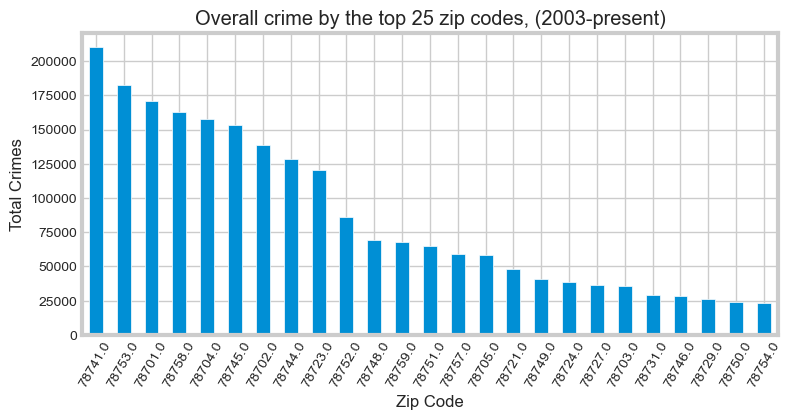

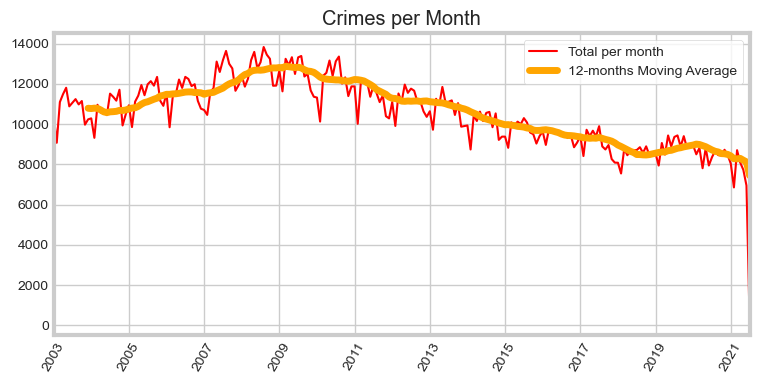

In [10]:
# Create and display dataframes for crime rates by zipcode and as percentages
display(df.zip_code.value_counts().head(25).to_frame())
display(df.zip_code.value_counts(normalize=True).head(25).to_frame())

# Visualizing the top 25 crime-ridden zip codes in Austin
plt.figure(figsize=(8, 4), dpi=100)
df.zip_code.value_counts().head(25).plot.bar(
    title="Overall crime by the top 25 zip codes, (2003-present)",
    xlabel="Zip Code",
    ylabel="Total Crimes",
    rot=60,
)
plt.show()

# Creating a time series plot with a 12 month rolling average
plt.figure(figsize=(8, 4), dpi=100)
df.resample("M").size().plot(color="red", linewidth=1.5, label="Total per month")
df.resample("M").size().rolling(window=12).mean().plot(
    color="orange",
    linewidth=5,
    label="12-months Moving Average",
    title="Crimes per Month",
    xlabel="",
    rot=60,
)
plt.legend()
plt.show()

### B. Examining the top crime types in Austin 

highest_offense_description
BURGLARY OF VEHICLE                                  232961
THEFT                                                214262
FAMILY DISTURBANCE                                   183868
CRIMINAL MISCHIEF                                    129570
ASSAULT W/INJURY-FAM/DATE VIOL                        79400
BURGLARY OF RESIDENCE                                 77838
DWI                                                   70315
PUBLIC INTOXICATION                                   69096
HARASSMENT                                            65194
DISTURBANCE - OTHER                                   62683

BURGLARY OF VEHICLE  HARASSMENT  BURGLARY OF RESIDENCE  \
occurred_date_time                                                           
2003-01-31                         1225         293                    328   
2003-02-28                         1110         309                    248   
2003-03-31                         1222         363                    393   
2003-04-30                         1396         353                    398   
2003-05-31                         1487         345                    436   
...                                 ...         ...                    ...   
2021-03-31                          431         194                    154   
2021-04-30                          370         171                    128   
2021-05-31                          348         145                    154   
2021-06-30                          313         142                    136   
2021-07-31                            4           1                      9   

                    ASSAULT W/INJURY-FAM/DATE VIOL  CRIMINAL MISCHIEF  \
occurred_date_time                                                      
2003-01-31                                     349                722   
2003-02-28                                     342                594   
2003-03-31                                     421                700   
2003-04-30                                     432                709   
2003-05-31                                     424                750   
...                                            ...                ...   
2021-03-31                                     259                431   
2021-04-30                                     268                419   
2021-05-31                                     312                397   
2021-06-30                                     265                348   
2021-07-31                                      17                  8   

                    PUBLIC INTOXICATION  DWI  FAMILY DISTURBANCE  TOTAL  
occurred_date_time                                                       
2003-01-31                          341  408                 505   4171  
2003-02-28                          354  328                 500   3785  
2003-03-31                          450  406                 546   4501  
2003-04-30                          385  375                 678   4726  
2003-05-31                          451  418                 650   4961  
...                                 ...  ...                 ...    ...  
2021-03-31                           75  179                 877   2600  
2021-04-30                           67  126                 799   2348  
2021-05-31                           61  134                 885   2436  
2021-06-30                           71  133                 784   2192  
2021-07-31                            7    8                  16     70  

[223 rows x 9 columns]

<Figure size 432x288 with 0 Axes>

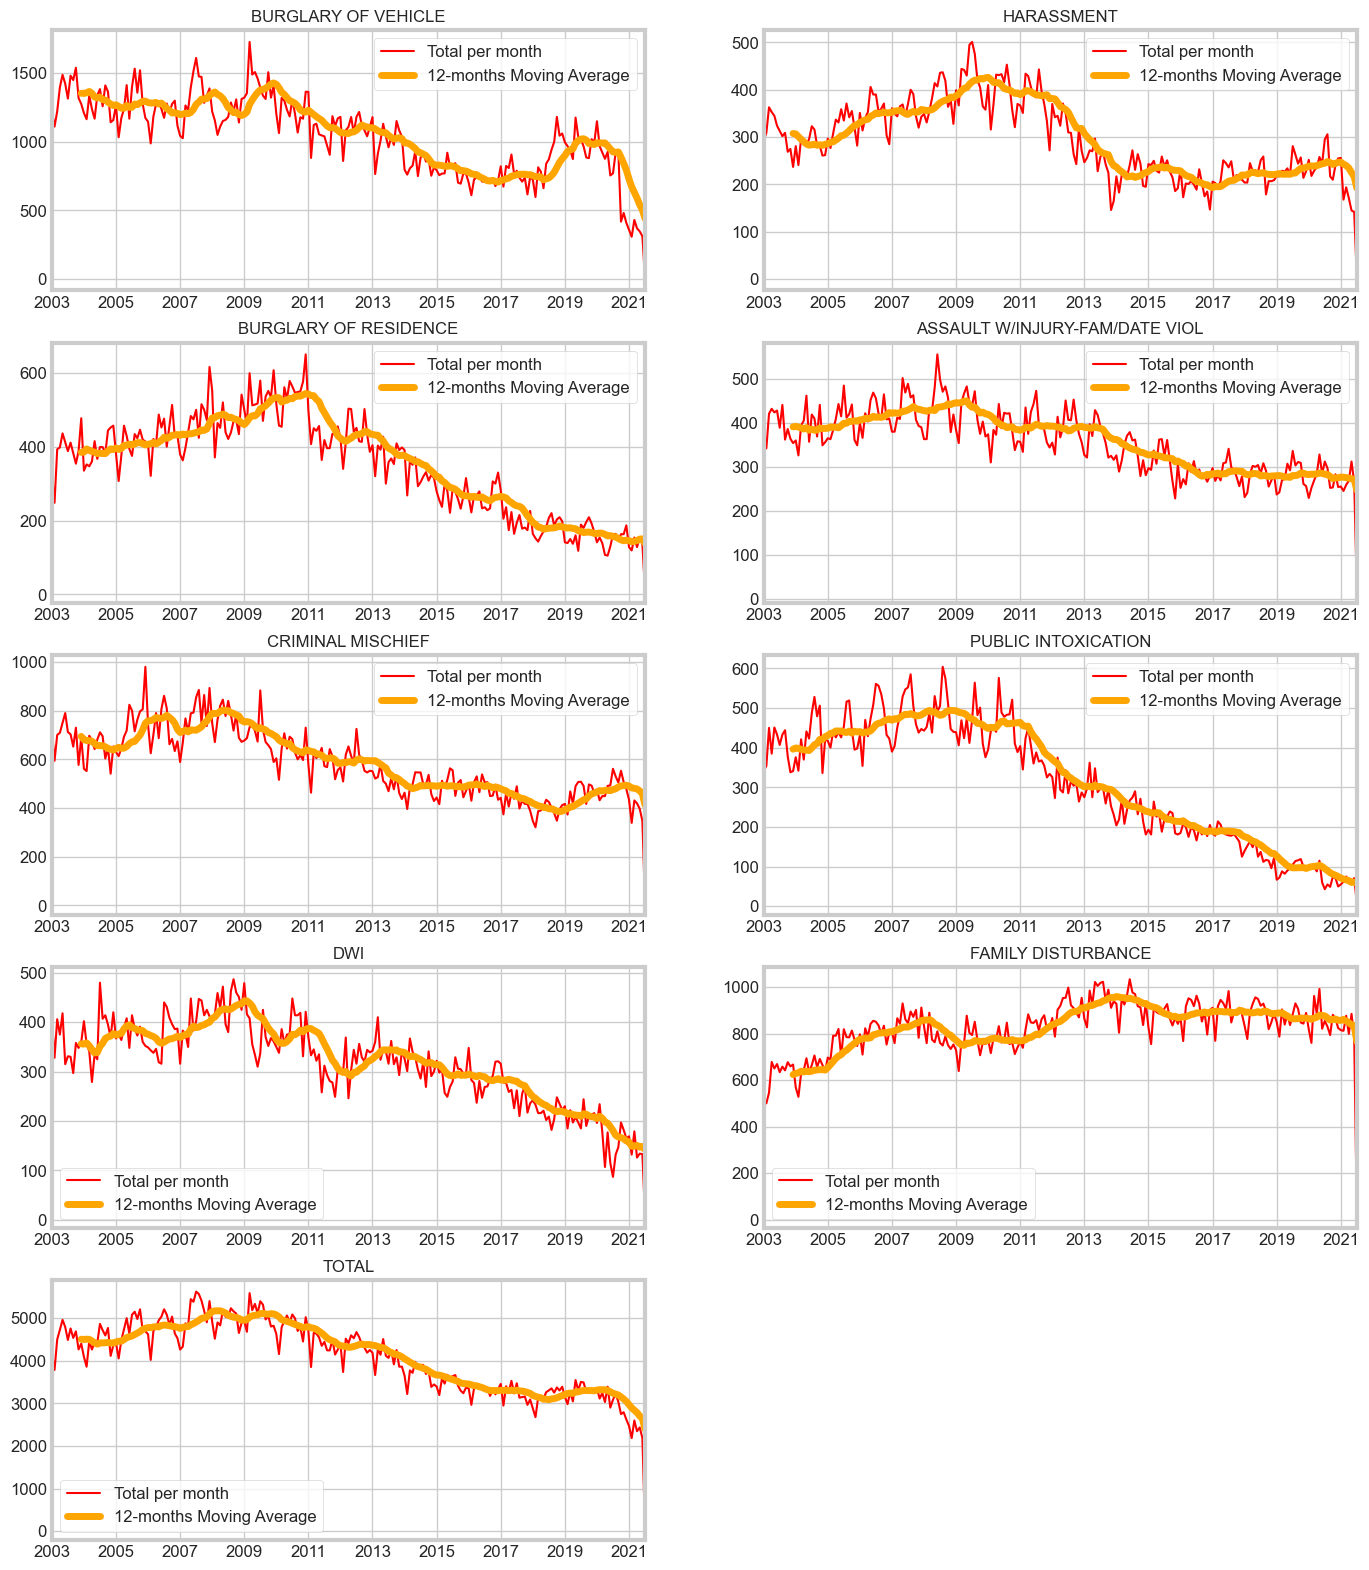

In [11]:
display(df["highest_offense_description"].value_counts().head(10).to_frame())

df2 = df.query(
    'highest_offense_description == ["BURGLARY OF VEHICLE", "FAMILY DISTURBANCE", "CRIMINAL MISCHIEF", "ASSAULT W/INJURY-FAM/DATE VIOL", "BURGLARY OF RESIDENCE", "DWI", "PUBLIC INTOXICATION", "HARASSMENT"]'
)

monthly = pd.DataFrame(
    df2[df2["highest_offense_description"] == "BURGLARY OF VEHICLE"]
    .resample("M")
    .size()
)
monthly.columns = ["BURGLARY OF VEHICLE"]

for i in df2["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df2[df2["highest_offense_description"] == i].resample("M").size()
    )

monthly["TOTAL"] = monthly.sum(axis=1)

crimeType = monthly.columns

display(monthly)

plt.figure(1)
plt.figure(figsize=(15, 20), dpi=100)

i = 521
for eachCrime in crimeType:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12-months Moving Average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1
plt.show()

<a id='q2'></a>
### C. How is crime distributed in 78701 (downtown Austin)? 

highest_offense_description
PUBLIC INTOXICATION                                   17228
THEFT                                                 15991
BURGLARY OF VEHICLE                                    9370
WARRANT ARREST NON TRAFFIC                             8970
DWI                                                    8362
ASSAULT WITH INJURY                                    7682
VIOL CITY ORDINANCE - OTHER                            6194
POSS OF DRUG PARAPHERNALIA                             6106
CRIMINAL MISCHIEF                                      5951
CRIMINAL TRESPASS                                      3986
POSSESSION OF MARIJUANA                                3415
DISTURBANCE - OTHER                                    3410
CUSTODY ARREST TRAFFIC WARR                            2993
POSS CONTROLLED SUB/NARCOTIC                           2933
CAMPING IN PARK                                        2785
VOCO - ALCOHOL  CONSUMPTION                            2690
ASSAULT BY CONTACT                                     2656
CRIMINAL TRESPASS/TRANSIENT                            2597
THEFT OF BICYCLE                                       2557
URINATING IN PUBLIC PLACE                              2339
FAMILY DISTURBANCE                                     2226
DOC FIGHTING                                           2152
PROTECTIVE ORDER                                       2099
ASSAULT W/INJURY-FAM/DATE VIOL                         1751

highest_offense_description
PUBLIC INTOXICATION                                0.100827
THEFT                                              0.093587
BURGLARY OF VEHICLE                                0.054838
WARRANT ARREST NON TRAFFIC                         0.052497
DWI                                                0.048939
ASSAULT WITH INJURY                                0.044959
VIOL CITY ORDINANCE - OTHER                        0.036250
POSS OF DRUG PARAPHERNALIA                         0.035735
CRIMINAL MISCHIEF                                  0.034828
CRIMINAL TRESPASS                                  0.023328
POSSESSION OF MARIJUANA                            0.019986
DISTURBANCE - OTHER                                0.019957
CUSTODY ARREST TRAFFIC WARR                        0.017517
POSS CONTROLLED SUB/NARCOTIC                       0.017165
CAMPING IN PARK                                    0.016299
VOCO - ALCOHOL  CONSUMPTION                        0.015743
ASSAULT BY CONTACT                                 0.015544
CRIMINAL TRESPASS/TRANSIENT                        0.015199
THEFT OF BICYCLE                                   0.014965
URINATING IN PUBLIC PLACE                          0.013689
FAMILY DISTURBANCE                                 0.013028
DOC FIGHTING                                       0.012595
PROTECTIVE ORDER                                   0.012284
ASSAULT W/INJURY-FAM/DATE VIOL                     0.010248

<AxesSubplot:title={'center':'Crime Distribution (78701)'}, ylabel='highest_offense_description'>

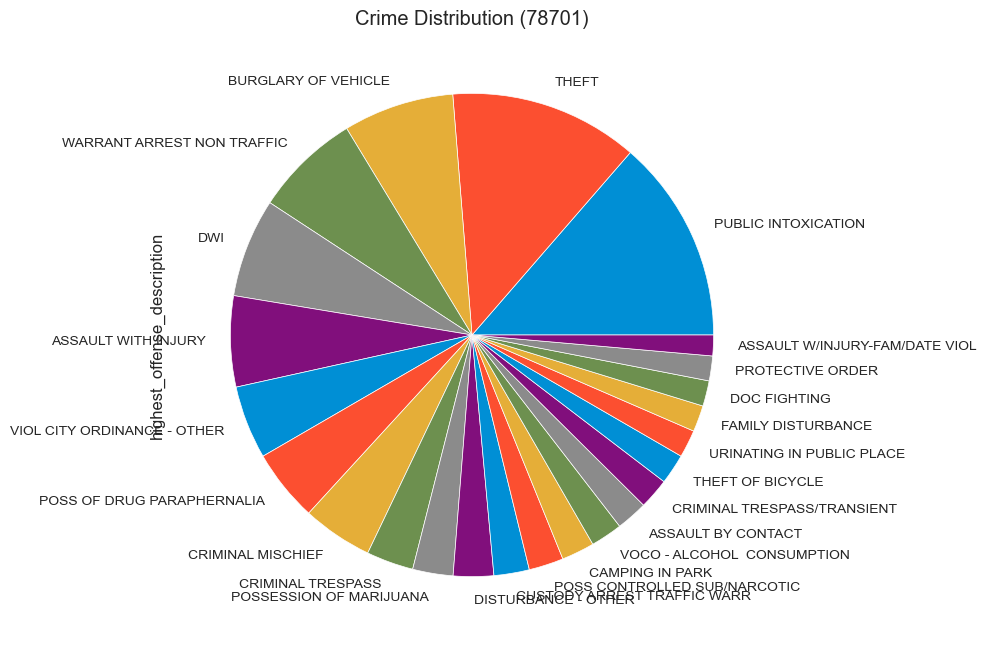

In [12]:
# Examining crime in the 78701 area
df_01 = df[df.zip_code == 78701]

# Create a dataframe for the top crime categories in the zipcode
df_01_off = df_01.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_01_off.to_frame())
display(
    df_01.highest_offense_description.value_counts(normalize=True).head(24).to_frame()
)
plt.figure(dpi=100)
df_01_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78701)")

<a id='q3'></a>
### D. How is crime distributed in 78753 (Rundberg & N Lamar)? 

highest_offense_description
THEFT                                                 17322
BURGLARY OF VEHICLE                                   16058
FAMILY DISTURBANCE                                    15019
CRIMINAL MISCHIEF                                      9617
THEFT BY SHOPLIFTING                                   7721
ASSAULT W/INJURY-FAM/DATE VIOL                         7301
BURGLARY OF RESIDENCE                                  6125
DWI                                                    5107
DISTURBANCE - OTHER                                    4863
AUTO THEFT                                             4367
CUSTODY ARREST TRAFFIC WARR                            4364
HARASSMENT                                             4327
POSS OF DRUG PARAPHERNALIA                             3746
ASSAULT WITH INJURY                                    3402
PUBLIC INTOXICATION                                    3390
CRIMINAL TRESPASS                                      3192
POSS CONTROLLED SUB/NARCOTIC                           3026
RUNAWAY CHILD                                          2971
WARRANT ARREST NON TRAFFIC                             2802
POSSESSION OF MARIJUANA                                2726
BURGLARY NON RESIDENCE                                 2533
VIOL CITY ORDINANCE - OTHER                            1874

----------------------------------


highest_offense_description
THEFT                                              0.094972
BURGLARY OF VEHICLE                                0.088042
FAMILY DISTURBANCE                                 0.082345
CRIMINAL MISCHIEF                                  0.052727
THEFT BY SHOPLIFTING                               0.042332
ASSAULT W/INJURY-FAM/DATE VIOL                     0.040029
BURGLARY OF RESIDENCE                              0.033582
DWI                                                0.028000
DISTURBANCE - OTHER                                0.026662
AUTO THEFT                                         0.023943
CUSTODY ARREST TRAFFIC WARR                        0.023927
HARASSMENT                                         0.023724
POSS OF DRUG PARAPHERNALIA                         0.020538
ASSAULT WITH INJURY                                0.018652
PUBLIC INTOXICATION                                0.018586
CRIMINAL TRESPASS                                  0.017501
POSS CONTROLLED SUB/NARCOTIC                       0.016591
RUNAWAY CHILD                                      0.016289
WARRANT ARREST NON TRAFFIC                         0.015363
POSSESSION OF MARIJUANA                            0.014946
BURGLARY NON RESIDENCE                             0.013888
VIOL CITY ORDINANCE - OTHER                        0.010275

<AxesSubplot:title={'center':'Crime Distribution (78753)'}, ylabel='highest_offense_description'>

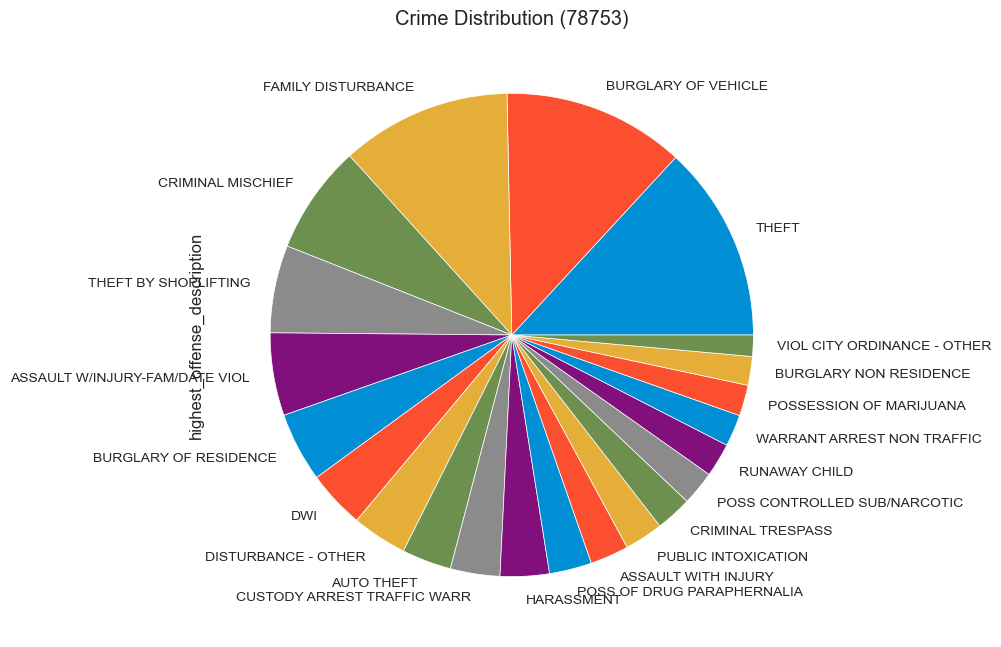

In [13]:
# Examining crime in the 78753 area
df_53 = df[df.zip_code == 78753]

# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_53_off.to_frame())
print("----------------------------------")
display(
    df_53.highest_offense_description.value_counts(normalize=True).head(22).to_frame()
)

plt.figure(dpi=100)
df_53_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78753)")

<a id='q4'></a>
### E. How is crime distributed in 78741 (E Riverside/Oltorf)? 

highest_offense_description
FAMILY DISTURBANCE                                    20746
BURGLARY OF VEHICLE                                   19970
THEFT                                                 15785
CRIMINAL MISCHIEF                                     11186
ASSAULT W/INJURY-FAM/DATE VIOL                         9746
BURGLARY OF RESIDENCE                                  8971
PUBLIC INTOXICATION                                    6404
CUSTODY ARREST TRAFFIC WARR                            6011
DWI                                                    5719
HARASSMENT                                             5601
DISTURBANCE - OTHER                                    5250
AUTO THEFT                                             4765
ASSAULT WITH INJURY                                    4606
CRIMINAL TRESPASS                                      4000
POSS CONTROLLED SUB/NARCOTIC                           3917
POSSESSION OF MARIJUANA                                3807
THEFT BY SHOPLIFTING                                   3607
POSS OF DRUG PARAPHERNALIA                             3558
WARRANT ARREST NON TRAFFIC                             3448
RUNAWAY CHILD                                          2816
VIOL CITY ORDINANCE - OTHER                            2197

----------------------------------


highest_offense_description
FAMILY DISTURBANCE                                 0.098762
BURGLARY OF VEHICLE                                0.095068
THEFT                                              0.075145
CRIMINAL MISCHIEF                                  0.053251
ASSAULT W/INJURY-FAM/DATE VIOL                     0.046396
BURGLARY OF RESIDENCE                              0.042707
PUBLIC INTOXICATION                                0.030486
CUSTODY ARREST TRAFFIC WARR                        0.028615
DWI                                                0.027225
HARASSMENT                                         0.026664
DISTURBANCE - OTHER                                0.024993
AUTO THEFT                                         0.022684
ASSAULT WITH INJURY                                0.021927
CRIMINAL TRESPASS                                  0.019042
POSS CONTROLLED SUB/NARCOTIC                       0.018647
POSSESSION OF MARIJUANA                            0.018123
THEFT BY SHOPLIFTING                               0.017171
POSS OF DRUG PARAPHERNALIA                         0.016938
WARRANT ARREST NON TRAFFIC                         0.016414
RUNAWAY CHILD                                      0.013406
VIOL CITY ORDINANCE - OTHER                        0.010459

<AxesSubplot:title={'center':'Crime Distribution (78741)'}, ylabel='highest_offense_description'>

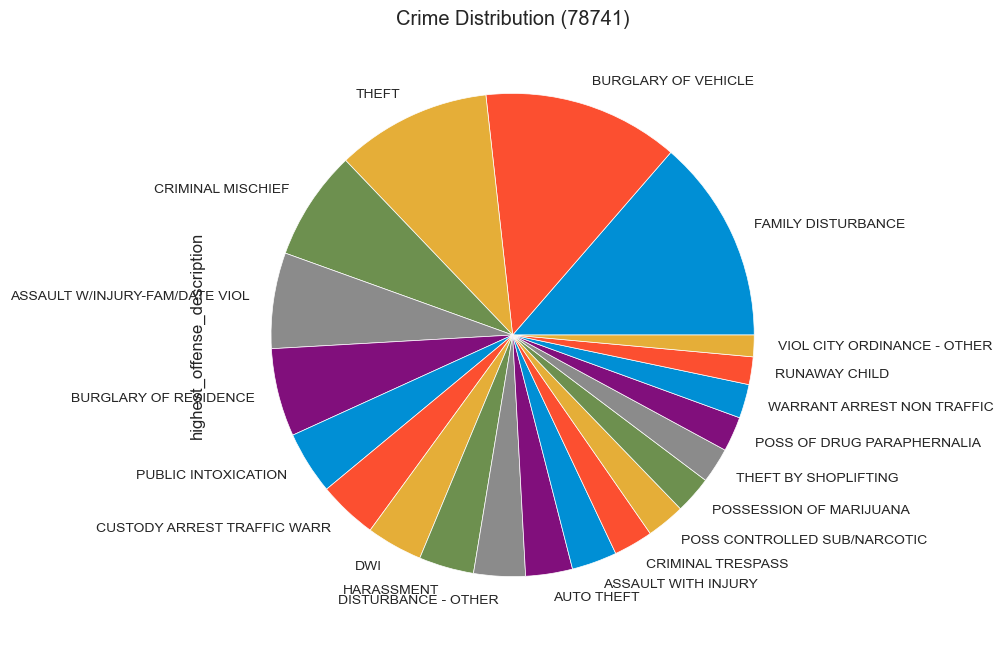

In [14]:
# Examining crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df.zip_code == 78741]

# Create a dataframe for the top crime categories in the zipcode
df_41_off = df_41.highest_offense_description.value_counts().head(21)

# print the different crime values & then as percentages
display(df_41_off.to_frame())
print("----------------------------------")
display(
    df_41.highest_offense_description.value_counts(normalize=True).head(21).to_frame()
)
plt.figure(dpi=100)
df_41_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78741)")

<a id='q5'></a>
### F. How is crime distributed in 78745 (far south Austin)?

highest_offense_description
FAMILY DISTURBANCE                                    15270
BURGLARY OF VEHICLE                                   14807
THEFT                                                 13704
CRIMINAL MISCHIEF                                      8653
BURGLARY OF RESIDENCE                                  5898
ASSAULT W/INJURY-FAM/DATE VIOL                         5838
HARASSMENT                                             5189
DISTURBANCE - OTHER                                    4592
DWI                                                    4466
PUBLIC INTOXICATION                                    4020
CUSTODY ARREST TRAFFIC WARR                            3248
AUTO THEFT                                             2944
BURGLARY NON RESIDENCE                                 2904
ASSAULT WITH INJURY                                    2742
RUNAWAY CHILD                                          2625
POSSESSION OF MARIJUANA                                2600
WARRANT ARREST NON TRAFFIC                             2113
POSS CONTROLLED SUB/NARCOTIC                           2065
THEFT BY SHOPLIFTING                                   2028
CRIMINAL TRESPASS                                      1991
IDENTITY THEFT                                         1685
POSS OF DRUG PARAPHERNALIA                             1530

----------------------------------


highest_offense_description
FAMILY DISTURBANCE                                 0.099490
BURGLARY OF VEHICLE                                0.096474
THEFT                                              0.089287
CRIMINAL MISCHIEF                                  0.056378
BURGLARY OF RESIDENCE                              0.038428
ASSAULT W/INJURY-FAM/DATE VIOL                     0.038037
HARASSMENT                                         0.033809
DISTURBANCE - OTHER                                0.029919
DWI                                                0.029098
PUBLIC INTOXICATION                                0.026192
CUSTODY ARREST TRAFFIC WARR                        0.021162
AUTO THEFT                                         0.019181
BURGLARY NON RESIDENCE                             0.018921
ASSAULT WITH INJURY                                0.017865
RUNAWAY CHILD                                      0.017103
POSSESSION OF MARIJUANA                            0.016940
WARRANT ARREST NON TRAFFIC                         0.013767
POSS CONTROLLED SUB/NARCOTIC                       0.013454
THEFT BY SHOPLIFTING                               0.013213
CRIMINAL TRESPASS                                  0.012972
IDENTITY THEFT                                     0.010978
POSS OF DRUG PARAPHERNALIA                         0.009969

<AxesSubplot:title={'center':'Crime Distribution (78745)'}, ylabel='highest_offense_description'>

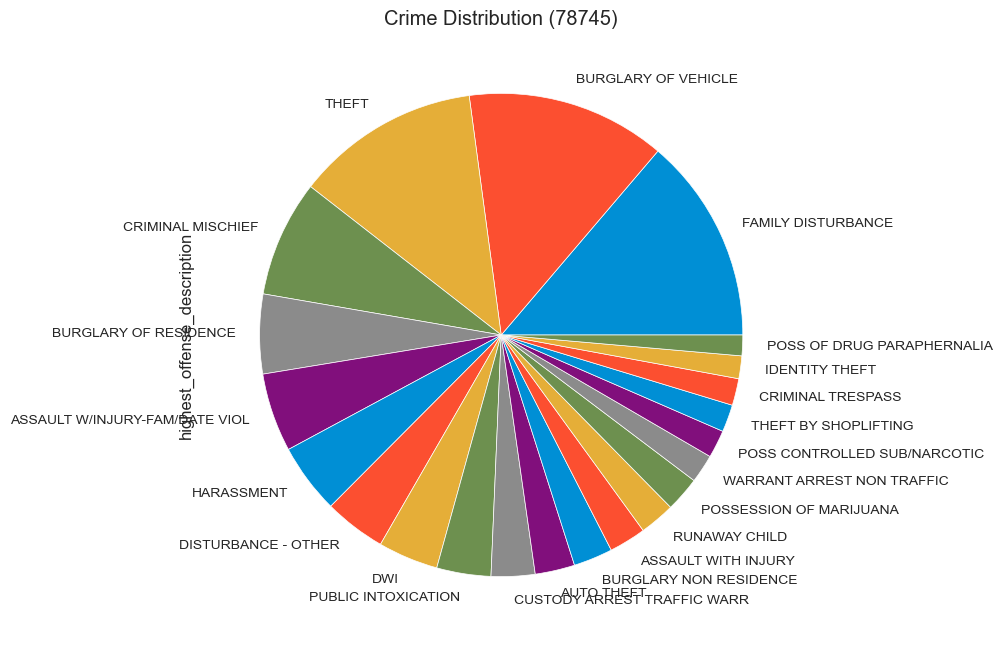

In [15]:
# Examining crime in the 78745 area
df_45 = df[df.zip_code == 78745]

# Create a dataframe for the top 10 crime categories in the zipcode
df_45_off = df_45.highest_offense_description.value_counts().head(22)

# print the different crime values & then as percentages
display(df_45_off.to_frame())
print("----------------------------------")
display(
    df_45.highest_offense_description.value_counts(normalize=True).head(22).to_frame()
)
plt.figure(dpi=100)
df_45_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78745)")

<a id='q6'></a>
### G. How is crime distributed in 78705 (UT campus area)?

highest_offense_description
BURGLARY OF VEHICLE                                    8718
THEFT                                                  5676
CRIMINAL MISCHIEF                                      5022
THEFT OF BICYCLE                                       3550
PUBLIC INTOXICATION                                    2641
BURGLARY OF RESIDENCE                                  2141
WARRANT ARREST NON TRAFFIC                             1564
AUTO THEFT                                             1389
CRIMINAL TRESPASS                                      1375
ASSAULT WITH INJURY                                    1278
HARASSMENT                                             1242
FAMILY DISTURBANCE                                     1236
DWI                                                    1235
DISTURBANCE - OTHER                                    1131
BURGLARY NON RESIDENCE                                  895
CRIMINAL TRESPASS/TRANSIENT                             871
VIOL CITY ORDINANCE - OTHER                             798
GRAFFITI                                                788
CUSTODY ARREST TRAFFIC WARR                             786
ASSAULT W/INJURY-FAM/DATE VIOL                          711
POSSESSION OF MARIJUANA                                 668
ASSAULT BY CONTACT                                      634

'----------------------------------'

highest_offense_description
BURGLARY OF VEHICLE                                0.149645
THEFT                                              0.097429
CRIMINAL MISCHIEF                                  0.086203
THEFT OF BICYCLE                                   0.060936
PUBLIC INTOXICATION                                0.045333
BURGLARY OF RESIDENCE                              0.036750
WARRANT ARREST NON TRAFFIC                         0.026846
AUTO THEFT                                         0.023842
CRIMINAL TRESPASS                                  0.023602
ASSAULT WITH INJURY                                0.021937
HARASSMENT                                         0.021319
FAMILY DISTURBANCE                                 0.021216
DWI                                                0.021199
DISTURBANCE - OTHER                                0.019414
BURGLARY NON RESIDENCE                             0.015363
CRIMINAL TRESPASS/TRANSIENT                        0.014951
VIOL CITY ORDINANCE - OTHER                        0.013698
GRAFFITI                                           0.013526
CUSTODY ARREST TRAFFIC WARR                        0.013492
ASSAULT W/INJURY-FAM/DATE VIOL                     0.012204
POSSESSION OF MARIJUANA                            0.011466
ASSAULT BY CONTACT                                 0.010883

<AxesSubplot:title={'center':'Crime Distribution (78705)'}, ylabel='highest_offense_description'>

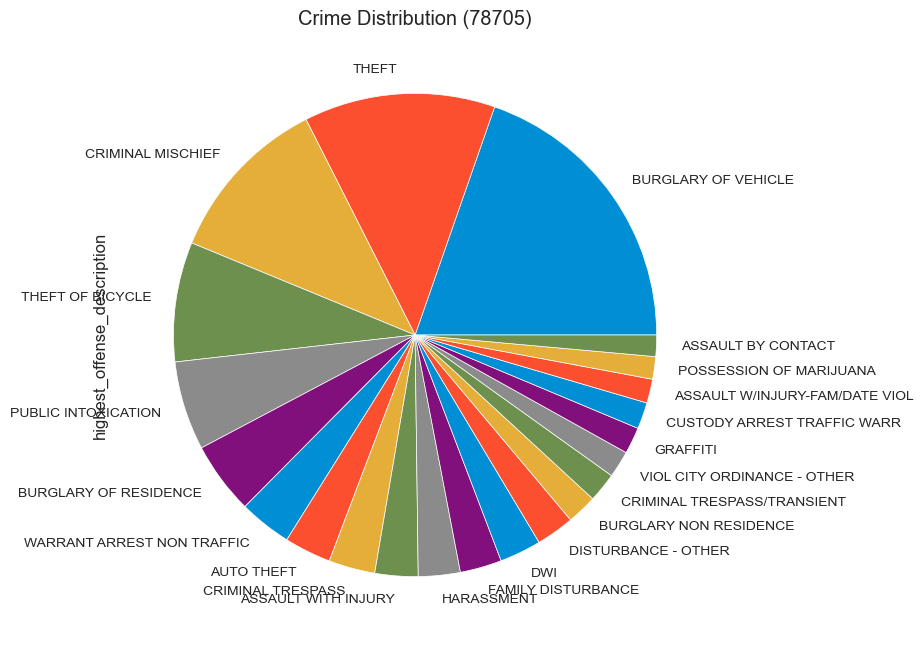

In [16]:
# Examining crime in the 78705 area
df_05 = df[df.zip_code == 78705]

# Create a dataframe for the top 10 crime categories in the zipcode
df_05_off = df_05.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_05_off.to_frame())
display("----------------------------------")
display(
    df_05.highest_offense_description.value_counts(normalize=True).head(22).to_frame()
)
plt.figure(dpi=100)
df_05_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78705)")

<a id='q7'></a>
### H. How is crime distributed in 78746? 

highest_offense_description
BURGLARY OF VEHICLE                                    5450
THEFT                                                  5116
THEFT BY SHOPLIFTING                                   2564
CRIMINAL MISCHIEF                                      1284
DWI                                                     893
FAMILY DISTURBANCE                                      779
VIOL CITY ORDINANCE - OTHER                             652
HARASSMENT                                              638
AUTO THEFT                                              617
BURGLARY OF RESIDENCE                                   524
THEFT FROM PERSON                                       462
IDENTITY THEFT                                          456
DISTURBANCE - OTHER                                     441
BURGLARY NON RESIDENCE                                  359
ASSAULT W/INJURY-FAM/DATE VIOL                          343
CRED CARD ABUSE - OTHER                                 331
PUBLIC INTOXICATION                                     322
POSSESSION OF MARIJUANA                                 297
FRAUD - OTHER                                           284
SUSPICIOUS PERSON                                       259
CUSTODY ARREST TRAFFIC WARR                             247
WARRANT ARREST NON TRAFFIC                              223
ASSAULT WITH INJURY                                     201
THEFT OF BICYCLE                                        195

highest_offense_description
BURGLARY OF VEHICLE                                0.190653
THEFT                                              0.178969
THEFT BY SHOPLIFTING                               0.089694
CRIMINAL MISCHIEF                                  0.044917
DWI                                                0.031239
FAMILY DISTURBANCE                                 0.027251
VIOL CITY ORDINANCE - OTHER                        0.022808
HARASSMENT                                         0.022319
AUTO THEFT                                         0.021584
BURGLARY OF RESIDENCE                              0.018331
THEFT FROM PERSON                                  0.016162
IDENTITY THEFT                                     0.015952
DISTURBANCE - OTHER                                0.015427
BURGLARY NON RESIDENCE                             0.012559
ASSAULT W/INJURY-FAM/DATE VIOL                     0.011999
CRED CARD ABUSE - OTHER                            0.011579
PUBLIC INTOXICATION                                0.011264
POSSESSION OF MARIJUANA                            0.010390
FRAUD - OTHER                                      0.009935
SUSPICIOUS PERSON                                  0.009060
CUSTODY ARREST TRAFFIC WARR                        0.008641
WARRANT ARREST NON TRAFFIC                         0.007801
ASSAULT WITH INJURY                                0.007031
THEFT OF BICYCLE                                   0.006822

<AxesSubplot:title={'center':'Crime Distribution (78746)'}, ylabel='highest_offense_description'>

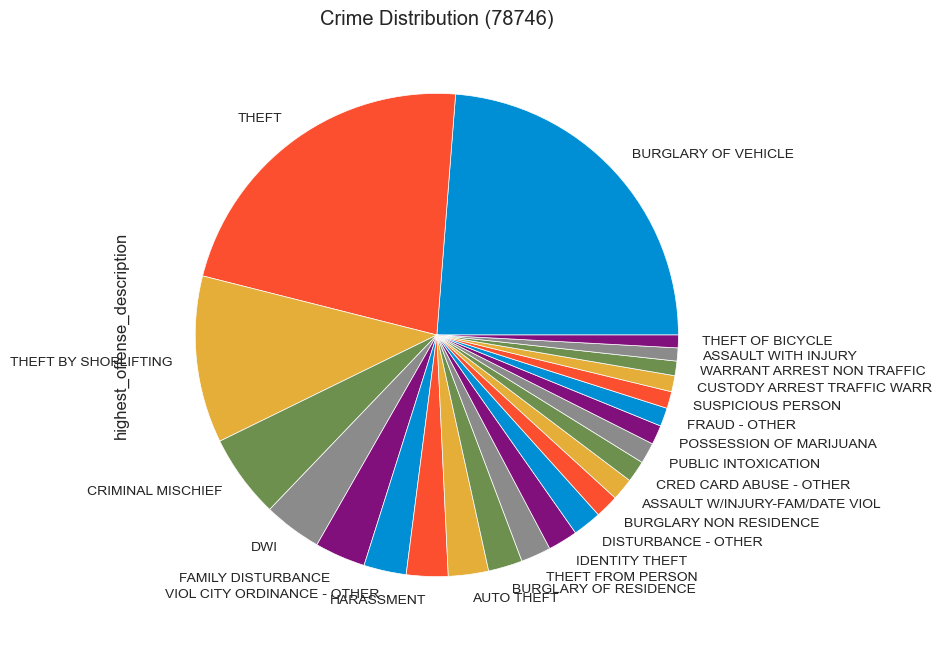

In [17]:
# Examining crime in the 78701 area
df_46 = df[df.zip_code == 78746]

# Create a dataframe for the top crime categories in the zipcode
df_46_off = df_46.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_46_off.to_frame())
display(
    df_46.highest_offense_description.value_counts(normalize=True).head(24).to_frame()
)
plt.figure(dpi=100)
df_46_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78746)")

<a id='q8'></a>
### I. How are violent crimes istributed? 

In [18]:
# Creating separate dataframes for violent crime & murder rates
df_viol = df.query(
    'category_description == ["Aggravated Assault", "Robbery", "Rape", "Murder"]'
)
df_mur = df[df.category_description == "Murder"]
df_agg_asslt = df[df.category_description == "Aggravated Assault"]
df_robbery = df[df.category_description == "Robbery"]
df_rape = df[df.category_description == "Rape"]

# Creating yearly dataframes
# Annual overall crime
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]
df_21 = df[df.year == 2021]

# Annual violent crime
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]
df_viol_21 = df_viol[df_viol.year == 2021]

# Annual murders
df_mur_17 = df_mur[df_mur.year == 2017]
df_mur_18 = df_mur[df_mur.year == 2018]
df_mur_19 = df_mur[df_mur.year == 2019]
df_mur_20 = df_mur[df_mur.year == 2020]
df_mur_21 = df_mur[df_mur.year == 2021]

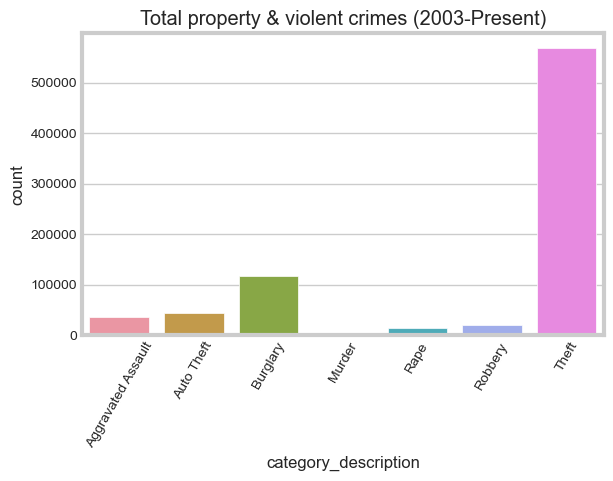

Theft                 569384
Burglary              117152
Auto Theft             44994
Aggravated Assault     35680
Robbery                20435
Rape                   13558
Murder                   556
Name: category_description, dtype: int64

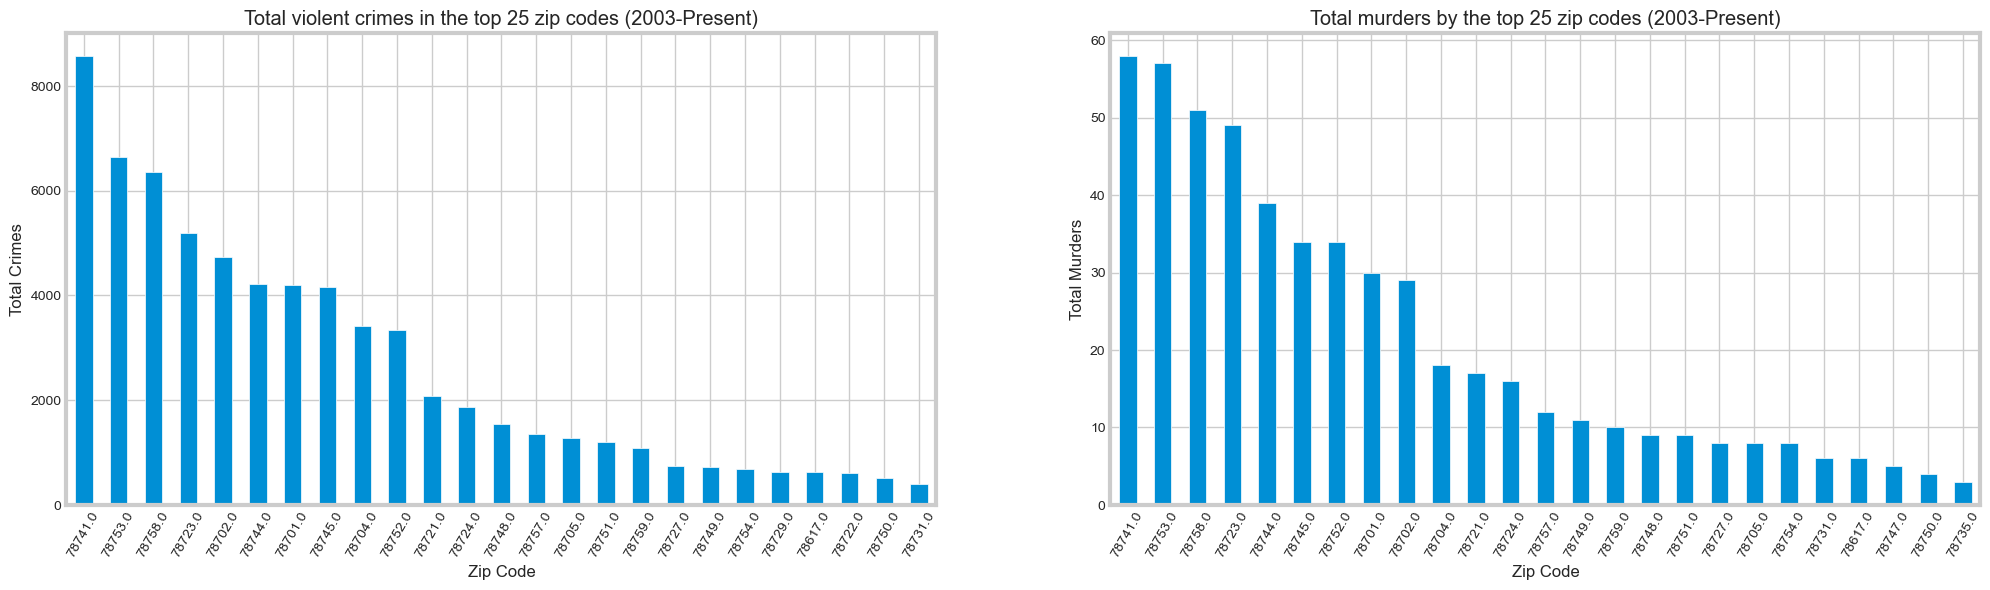

category_description  Aggravated Assault  Murder  Rape  Robbery
zip_code                                                       
0.0                                    1       0     0        0
78610.0                                2       0     3        0
78613.0                               45       1    29       58
78617.0                              355       6   157      106
78621.0                                2       0     0        0
78634.0                                1       0     0        0
78640.0                                0       0     3        0
78641.0                                1       0     0        0
78645.0                                0       0     1        0
78652.0                                8       0     1        1
78653.0                               36       1     7        5
78660.0                              157       3    42       57
78664.0                                7       0     8        0
78669.0                                0       0     1        0
78681.0                                3       0     3        0
78701.0                             2057      30   771     1351
78702.0                             2437      29   617     1657
78703.0                              166       2    85      113
78704.0                             1635      18   779      988
78705.0                              500       8   449      313
78712.0                                1       0     3        0
78717.0                              153       1    46       39
78719.0                               26       0     3       10
78721.0                             1302      17   311      444
78722.0                              268       3    98      241
78723.0                             2592      49   805     1747
78724.0                             1152      16   356      341
78725.0                               76       1    43       13
78726.0                              173       2    93       32
78727.0                              417       8   176      152
78728.0                               21       1    12        3
78729.0                              338       2   151      137
78730.0                               36       0    17        4
78731.0                              191       6   119       89
78732.0                                1       0     2        1
78733.0                                2       0     5        1
78735.0                              224       3    77       47
78736.0                               59       0    31       13
78737.0                                8       0     5        1
78738.0                                1       0     0        0
78739.0                               37       0    40        4
78741.0                             4151      58  1371     3001
78742.0                               83       2    21       24
78744.0                             2355      39   894      938
78745.0                             2236      34   861     1024
78746.0                              127       3    78      134
78747.0                              237       5    95       45
78748.0                              836       9   381      317
78749.0                              362      11   202      144
78750.0                              257       4   139      106
78751.0                              525       9   279      392
78752.0                             1635      34   490     1191
78753.0                             3357      57  1137     2096
78754.0                              387       8   158      142
78756.0                              156       2    98       96
78757.0                              683      12   236      419
78758.0                             3129      51  1093     2083
78759.0                              554      10   255      276

<Figure size 432x288 with 0 Axes>

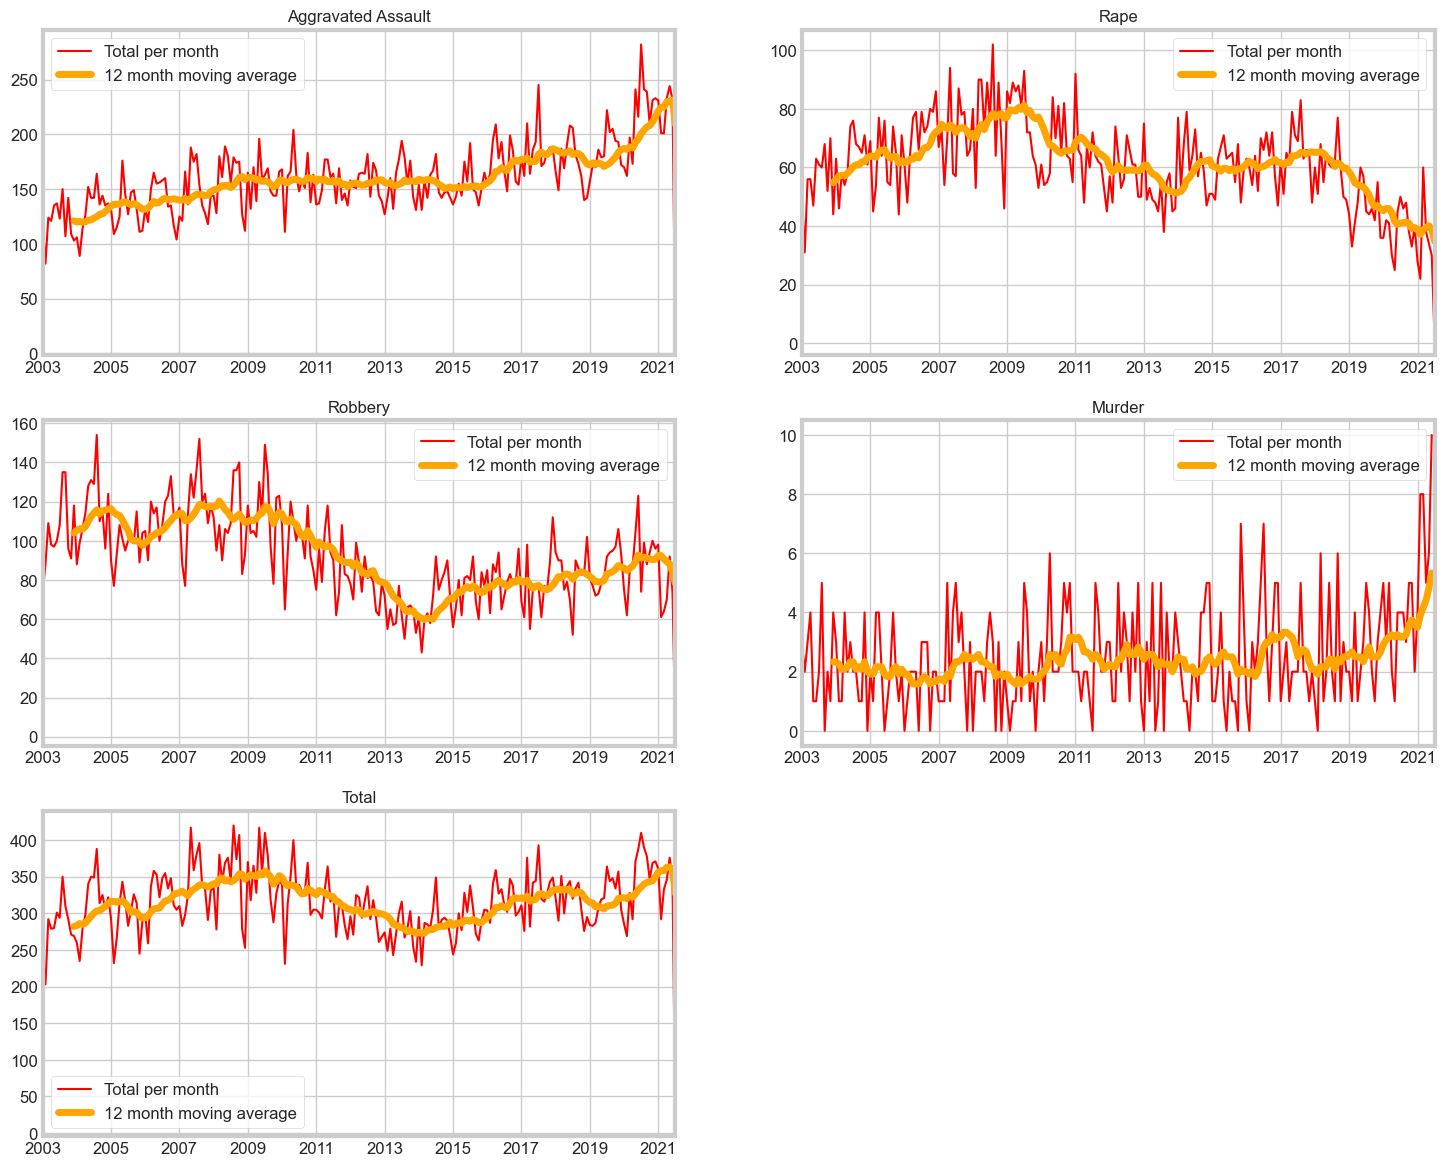

In [19]:
plt.figure(dpi=100)
plt.xlabel("Crime Type")
plt.ylabel("Total Incidents")
plt.xticks(rotation="60")
sb.countplot(df.category_description).set_title(
    "Total property & violent crimes (2003-Present)"
)
plt.show()

# display(df_viol.zip_code.value_counts(normalize=True).head(25))
display(df.category_description.value_counts())

fig, axs = plt.subplots(figsize=(22, 6.25), ncols=2, dpi=100)
df_viol.zip_code.value_counts().head(25).plot.bar(
    title="Total violent crimes in the top 25 zip codes (2003-Present)",
    xlabel="Zip Code",
    ylabel="Total Crimes",
    rot=60,
    ax=axs[0],
)
df_mur.zip_code.value_counts().head(25).plot.bar(
    title="Total murders by the top 25 zip codes (2003-Present)",
    xlabel="Zip Code",
    ylabel="Total Murders",
    rot=60,
    ax=axs[1],
)
plt.show()

viol_freq = pd.crosstab(df_viol.zip_code, df_viol.category_description)
mur_freq = pd.crosstab(df_mur.zip_code, df_mur.category_description)
display(viol_freq)

monthly_viol = pd.DataFrame(
    df_viol[df_viol["category_description"] == "Aggravated Assault"]
    .resample("M")
    .size()
)
monthly_viol.columns = ["Aggravated Assault"]

for i in df_viol["category_description"].unique():
    monthly_viol[i] = pd.DataFrame(
        df_viol[df_viol["category_description"] == i].resample("M").size()
    )

monthly_viol["Total"] = monthly_viol.sum(axis=1)

ViolCrimeTypes = monthly_viol.columns

plt.figure(1)
plt.figure(figsize=(16, 25), dpi=100)

i = 521
for eachCrime in ViolCrimeTypes:
    plt.subplot(i)
    monthly_viol[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly_viol[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12 month moving average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1

viol_freq.to_csv("viol_freq.csv")

Currently, 78741 shares 13.07% of violent crime, followed by 78753, sharing 9.92%.


### J. Distribution of violent crime and murders across council districts, APD Districts, and APD sectors 

<Figure size 600x400 with 0 Axes>

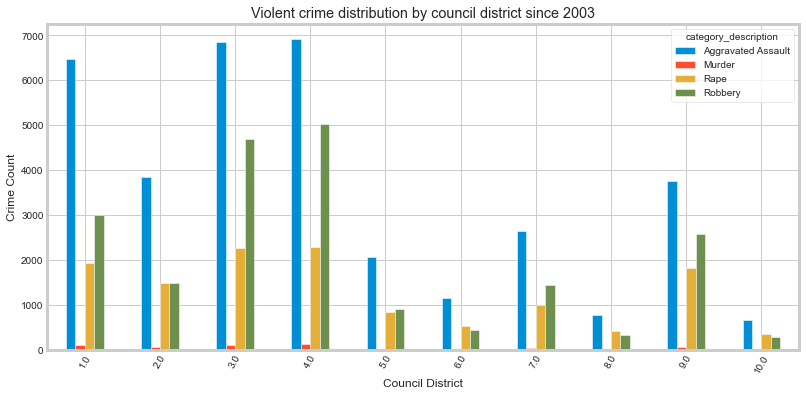

<Figure size 600x400 with 0 Axes>

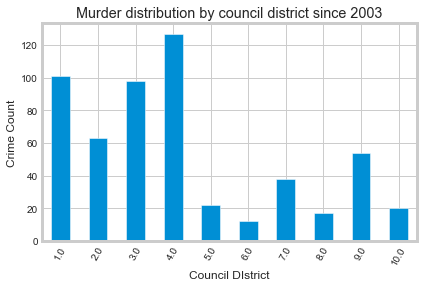

<Figure size 600x400 with 0 Axes>

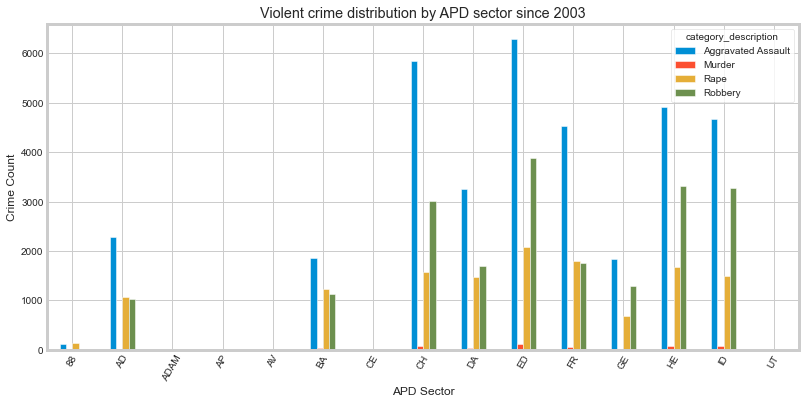

<Figure size 600x400 with 0 Axes>

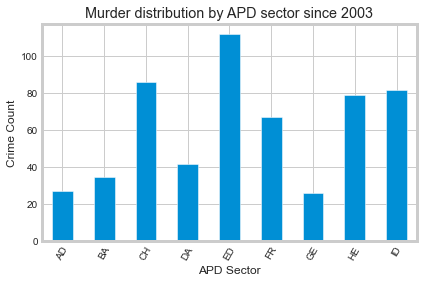

<Figure size 600x400 with 0 Axes>

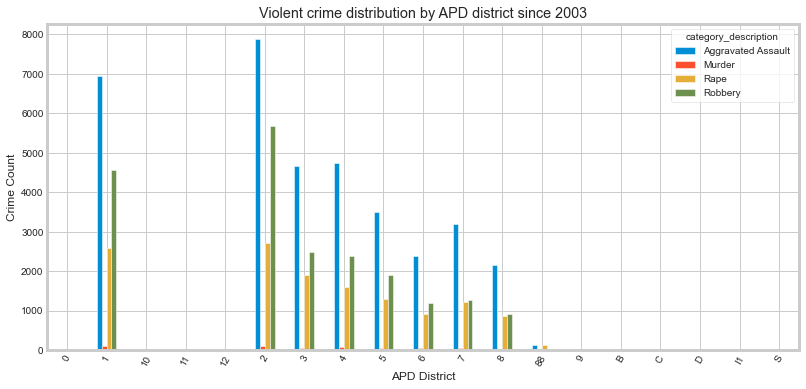

<Figure size 600x400 with 0 Axes>

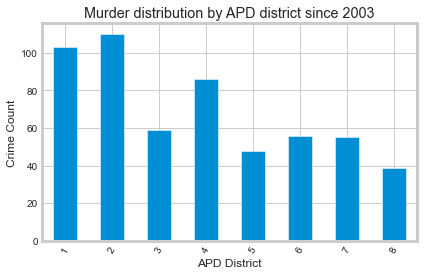

In [20]:
plt.figure(dpi=100)
pd.crosstab(df_viol.council_district, df_viol.category_description).plot.bar(
    figsize=(12, 6),
    rot=60,
    xlabel="Council District",
    ylabel="Crime Count",
    title="Violent crime distribution by council district since 2003",
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_mur.council_district, df_mur.category_description).plot.bar(
    rot=60,
    xlabel="Council DIstrict",
    ylabel="Crime Count",
    title="Murder distribution by council district since 2003",
    legend=False,
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_viol.apd_sector, df_viol.category_description).plot.bar(
    figsize=(12, 6),
    xlabel="APD Sector",
    ylabel="Crime Count",
    rot=60,
    title="Violent crime distribution by APD sector since 2003",
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_mur.apd_sector, df_mur.category_description).plot.bar(
    xlabel="APD Sector",
    ylabel="Crime Count",
    rot=60,
    title="Murder distribution by APD sector since 2003",
    legend=False,
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_viol.apd_district, df_viol.category_description).plot.bar(
    figsize=(12, 6),
    xlabel="APD District",
    ylabel="Crime Count",
    rot=60,
    title="Violent crime distribution by APD district since 2003",
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_mur.apd_district, df_mur.category_description).plot.bar(
    xlabel="APD District",
    ylabel="Crime Count",
    rot=60,
    title="Murder distribution by APD district since 2003",
    legend=False,
)
plt.show()

### K. Violent crime and murder distribution by location type

category_description                            Aggravated Assault  Murder  \
location_type                                                                
ABANDONED/CONDEMNED STRUCTURE                                   21       1   
AMUSEMENT PARK                                                   1       0   
ARENA / STADIUM / FAIRGROUNDS / COLISEUM                         2       0   
ATM SEPARATE FROM BANK                                           2       0   
AUTO DEALERSHIP NEW / USED                                      13       0   
BANKS / SAVINGS & LOAN                                          17       1   
BAR / NIGHT CLUB                                               758      12   
CAMP / CAMPGROUND                                               43       0   
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE                            34       1   
COMMERCIAL / OFFICE BUILDING                                   407       9   
COMMUNITY CENTER                                                10       0   
CONSTRUCTION SITE                                               38       0   
CONVENIENCE STORE                                              286       4   
DAYCARE FACILITY                                                 0       0   
DEPARTMENT / DISCOUNT STORE                                     62       0   
DRUG STORE / DR. OFFICE / HOSPITAL                             122       6   
FIELD / WOODS                                                  290      19   
GAMBLING FACILITY / CASINO / RACE TRACK                         10       1   
GAS / SERVICE STATIONS                                         270       6   
GOVERNMENT / PUBLIC BUILDING                                   113       2   
GROCERY / SUPERMARKET                                           72       2   
HOTEL / MOTEL / ETC.                                           770      15   
INDUSTRIAL SITE                                                  5       0   
JAIL / PRISON                                                    6       0   
LAKE / WATERWAY                                                 10       1   
LIQUOR STORE                                                     9       1   
OTHER / UNKNOWN                                                469      13   
PARK / PLAYGROUND                                              185       1   
PARKING LOTS / GARAGE                                         4908     103   
RENTAL STORAGE FACILITY                                         20       1   
RESIDENCE / HOME                                             17794     238   
REST AREA                                                        2       0   
RESTAURANTS                                                    258       3   
SCHOOL - COLLEGE / UNIVERSITY                                    5       0   
SCHOOL - ELEMENTARY / SECONDARY                                 11       0   
SCHOOLS / COLLEGES                                              43       2   
SHELTER-MISSION / HOMELESS                                      23       0   
SHOPPING MALL                                                    9       0   
SPECIALTY  STORE (TV  FUR ETC.)                                 52       0   
STREETS / HWY / ROAD / ALLEY                                  8365     111   
TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS)                 111       1   
TRIBAL LANDS                                                     0       0   

category_description                            Rape  Robbery  
location_type                                                  
ABANDONED/CONDEMNED STRUCTURE                     14       12  
AMUSEMENT PARK                                     1        2  
ARENA / STADIUM / FAIRGROUNDS / COLISEUM           0        0  
ATM SEPARATE FROM BANK                             0        8  
AUTO DEALERSHIP NEW / USED                         2        2  
BANKS / SAVINGS & LOAN                            10      395  
BAR / NIGHT CLUB                                 159   

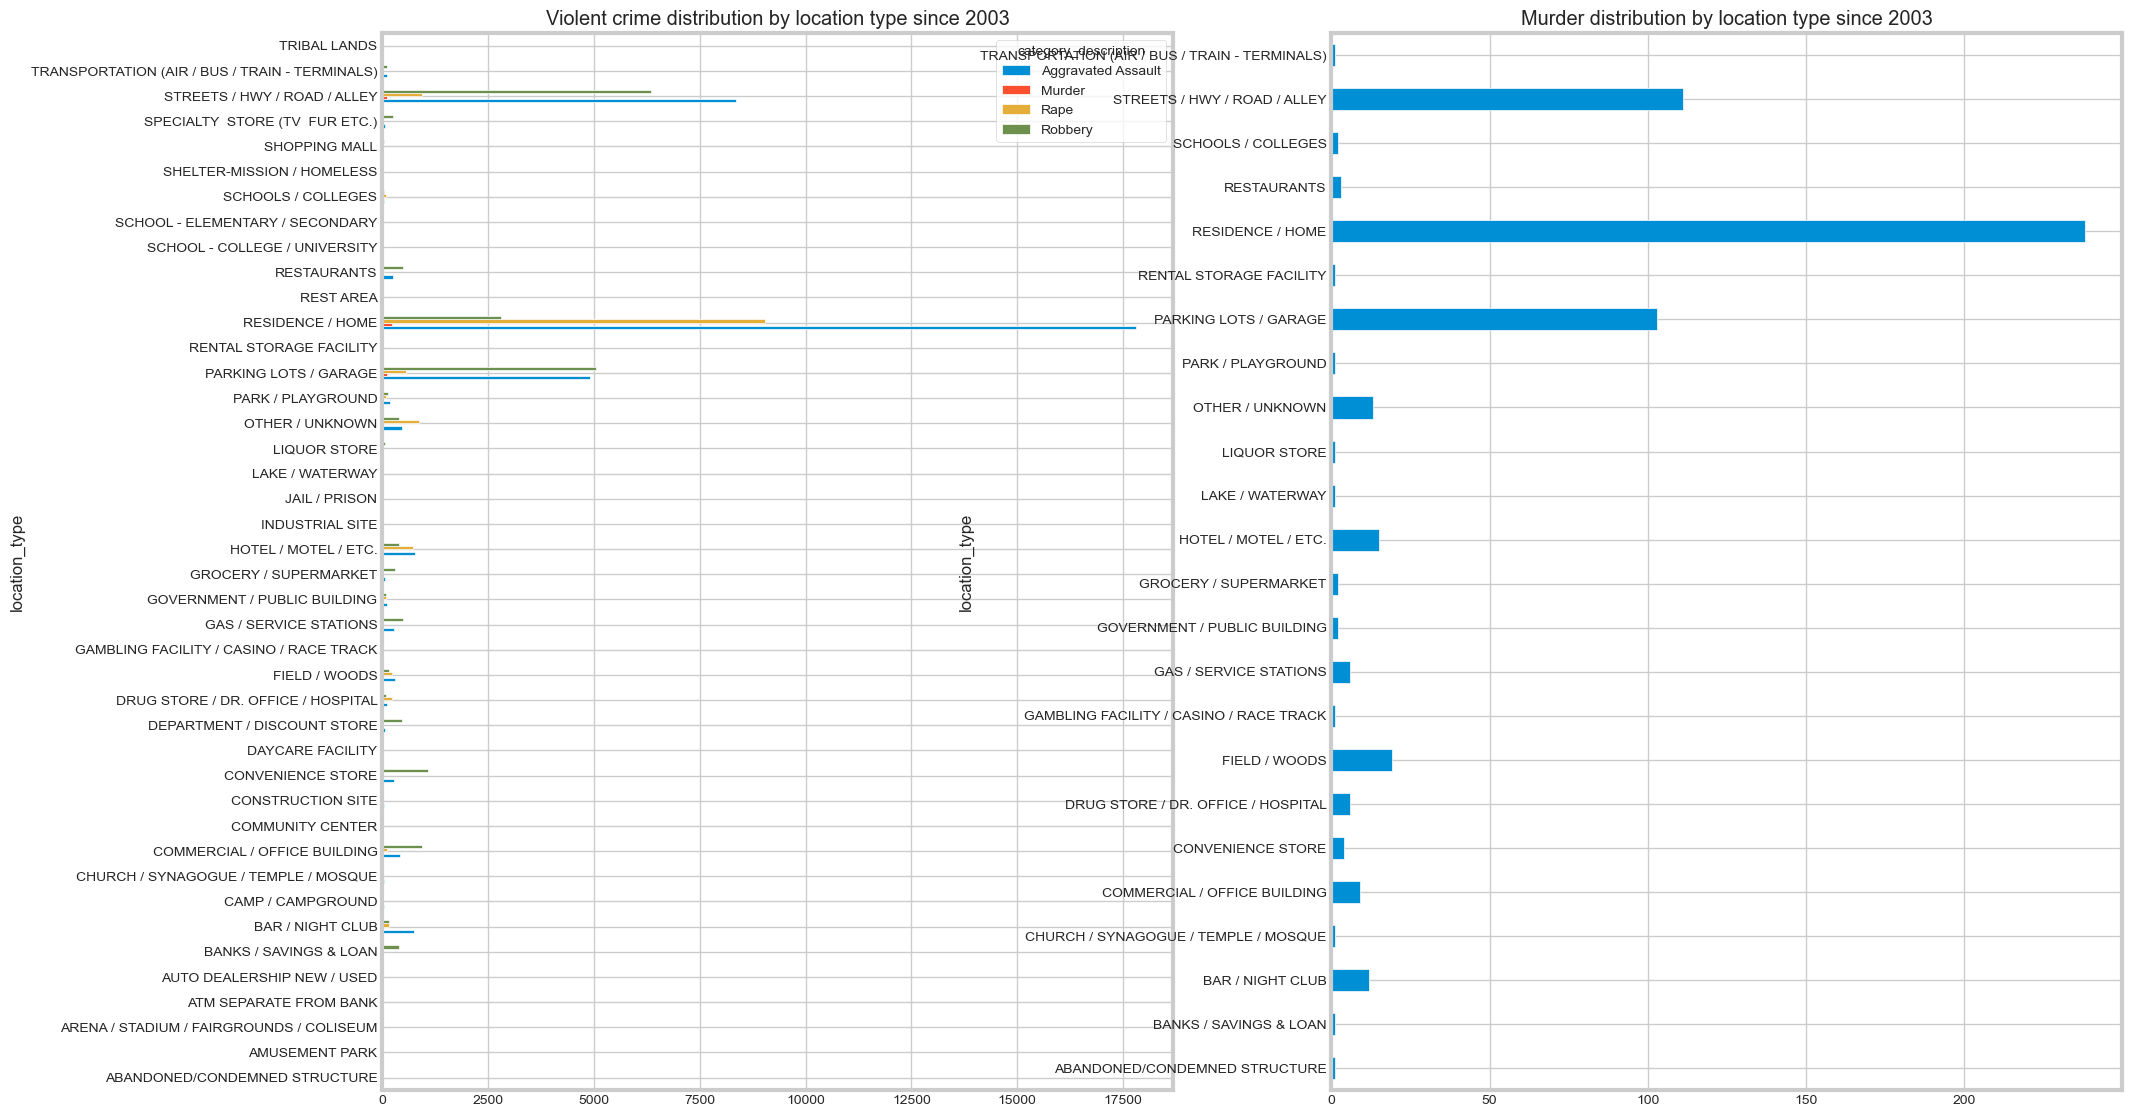

In [21]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.category_description)
display(viol_loc)

mur_loc = pd.crosstab(df_mur.location_type, df_mur.category_description)

fig, axs = plt.subplots(figsize=(20, 14), dpi=100, ncols=2)
viol_loc.plot.barh(
    title="Violent crime distribution by location type since 2003", ax=axs[0],
)
mur_loc.plot.barh(
    title="Murder distribution by location type since 2003", legend=False, ax=axs[1]
)
plt.show()


viol_loc.to_csv("viol_loc.csv")

<a id='q9'></a>
### L. How does violent crime appear on the map?

** Note: Rape incidents provide no location coordinates therefore cannot be shown on a map. **

#### Aggravated assault 

In [22]:
agg_asslt_coords_heat = df_agg_asslt[
    (df_agg_asslt["latitude"].isnull() == False)
    & (df_agg_asslt["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(agg_asslt_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="agg_asslt_heatmap.html")

k

#### Robbery 

In [23]:
agg_robbery_coords_heat = df_robbery[
    (df_robbery["latitude"].isnull() == False)
    & (df_robbery["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(
        agg_robbery_coords_heat[["latitude", "longitude"]].values, radius=15
    )
)

k.save(outfile="agg_robbery_heatmap.html")

k

<a id='q8'></a>
#### Murder  

In [24]:
mur_coords_heat = df_mur[
    (df_mur["latitude"].isnull() == False) & (df_mur["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(mur_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="mur_heatmap.html")

k

<a id='q10'></a>
### M. Are there any addresses where violent crime and murder occurs frequently?

In [25]:
# Show addresses with 50 or more reported violent crimes
df_viol.address.value_counts().head(50).to_frame()

address
00 BLOCK UNKNOWN                    163
900 BLOCK E 32ND ST                 146
1137 GUNTER ST                      143
1030 NORWOOD PARK BLVD              135
6409 SPRINGDALE RD                  131
500 E 7TH ST                        131
1700 BURTON DR                      126
1071 CLAYTON LN                     115
9024 NORTHGATE BLVD                 110
6103 MANOR RD                       109
9200 NORTH PLZ                      107
1054 SPRINGDALE RD                  103
1124 RUTLAND DR                     103
2901 S CAPITAL OF TEXAS HWY NB       97
9601 MIDDLE FISKVILLE RD             96
5800 TECHNI CENTER DR                94
9515 N LAMAR BLVD                    93
1000 E 41ST ST                       92
1500 FARO DR                         91
10000 N LAMAR BLVD                   90
6118 FAIRWAY ST                      90
7020 GRAND CANYON DR                 88
12151 N IH 35 SVRD NB                88
700 BLOCK E 8TH ST                   88
8800 N IH 35 SVRD SB                 87
1515 WICKERSHAM LN                   85
2401 S LAKESHORE BLVD                84
9300 NORTHGATE BLVD                  84
2237 E RIVERSIDE DR                  84
2500 BLOCK S CONGRESS AVE            83
9010 GALEWOOD DR                     81
2201 WILLOW CREEK DR                 79
7000 DECKER LN                       79
1300 CROSSING PL                     79
6855 E US 290 HWY SVRD EB            79
8312 N IH 35 SVRD SB                 78
3909 N IH 35 SVRD NB                 77
1845 BURTON DR                       75
9001 NORTHGATE BLVD                  75
2400 WICKERSHAM LN                   73
1601 ROYAL CREST DR                  73
4404 E OLTORF ST                     72
8926 N LAMAR BLVD                    72
2101 BURTON DR                       71
4900 BLOCK MUELLER BLVD              70
2005 WILLOW CREEK DR                 69
1600 WICKERSHAM LN                   69
3603 SOUTHRIDGE DR                   68
2200 S PLEASANT VALLEY RD            68
4700 E RIVERSIDE DR                  67

In [26]:
# Show addresses with 2 or more reported murders
df_mur.address.value_counts().head(35).to_frame()

address
4700 E RIVERSIDE DR              3
8800 N IH 35 SVRD SB             3
601 E 15TH ST                    3
8610 N LAMAR BLVD                3
6409 SPRINGDALE RD               3
6407 SPRINGDALE RD               3
9601 MIDDLE FISKVILLE RD         2
9036 N LAMAR BLVD                2
8225 SAM RAYBURN DR              2
2713 S CONGRESS AVE              2
9010 GALEWOOD DR                 2
2508 E RIVERSIDE DR              2
10610 MORADO CIR                 2
6118 FAIRWAY ST                  2
605 MASTERSON PASS               2
7000 DECKER LN                   2
6600 ED BLUESTEIN BLVD SB        2
7100 N IH 35 SVRD SB             2
10503 N LAMAR BLVD               2
2915 S IH 35 SVRD NB             2
201 W 5TH ST                     2
11105 N IH 35 SVRD NB            2
1137 GUNTER ST                   2
1050 SPRINGDALE RD               2
815 W SLAUGHTER LN               2
200 BLOCK E 6TH ST               2
1200 BLOCK E 38TH HALF ST        2
2501 ANKEN DR                    2
9220 N IH 35 SVRD SB             2
833 FAIRFIELD DR                 2
8912 N LAMAR BLVD                2
7330 BLUFF SPRINGS RD            2
4900 E OLTORF ST                 2
744 W WILLIAM CANNON DR          2
9200 NORTH PLZ                   2

In [27]:
df_clean = df.copy()
df_clean.to_csv("df_clean.csv")

df_17.to_csv("df_17.csv")
df_18.to_csv("df_18.csv")
df_19.to_csv("df_19.csv")
df_20.to_csv("df_20.csv")
df_21.to_csv("df_21.csv")

df_viol_17.to_csv("df_viol_17.csv")
df_viol_18.to_csv("df_viol_18.csv")
df_viol_19.to_csv("df_viol_19.csv")
df_viol_20.to_csv("df_viol_20.csv")
df_viol_21.to_csv("df_viol_21.csv")

df_mur_17.to_csv("df_mur_17.csv")
df_mur_18.to_csv("df_mur_18.csv")
df_mur_19.to_csv("df_mur_19.csv")
df_mur_20.to_csv("df_mur_20.csv")
df_mur_21.to_csv("df_mur_21.csv")

df_viol.to_csv("df_viol.csv")
df_mur.to_csv("df_mur.csv")
df_agg_asslt.to_csv("df_agg_asslt.csv")
df_rape.to_csv("df_rape.csv")

df_01.to_csv("df_01.csv")
df_53.to_csv("df_53.csv")
df_41.to_csv("df_41.csv")
df_45.to_csv("df_45.csv")
df_05.to_csv("df_05.csv")
df_46.to_csv("df_46.csv")